In [126]:
import numpy as np
import pandas as pd
import chardet
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [127]:
data = open('loan.csv', 'rb').read()
res = chardet.detect(data)
enc = res['encoding']
print(enc)

utf-8


Encoding used is utf-8

In [128]:
loan_df= pd.read_csv("loan.csv",encoding="utf-8",low_memory=False)

In [129]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


There are 39717 rows and 111 columns

Dropping columsn with more than half null values

In [130]:
nulls = loan_df.isnull().sum().apply(lambda n:n>20000)
nulls = nulls[nulls.values]
nulls.count()

57

In [131]:
loan_df=loan_df.drop(nulls.index, axis=1)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [132]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


There are 54 columns remaining now.Let us check for nulls again

In [133]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

Droopping columns if they have same value

In [134]:
uniques = loan_df.apply(lambda x: x.nunique())

In [135]:
uniques

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [136]:
loan_df=loan_df.drop(uniques[uniques==1].index, axis=1)

In [137]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

Dropping columns total_pymnt_inv, collection_recovery_fee , desc and title as these are not useful for our analysis

In [138]:
loan_df=loan_df.drop('total_pymnt_inv',axis=1)
loan_df=loan_df.drop('collection_recovery_fee',axis=1)
loan_df=loan_df.drop(['desc','title'],axis=1)


In [139]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  object 
 6   int_rate              39717 non-null  object 
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  emp_title             37258 non-null  object 
 11  emp_length            38642 non-null  object 
 12  home_ownership        39717 non-null  object 
 13  annual_inc            39717 non-null  float64
 14  verification_status   39717 non-null  object 
 15  issue_d            

We will drop current loans, Since we cannot conclude whether a loan applicant with current loan is going to default.

In [140]:
loan_df=loan_df.drop(loan_df[loan_df.loan_status=="Current"].index)

We can drop columns total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt and last_credit_pull_d

In [141]:
loan_df=loan_df.drop(['total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'],axis=1)

In [142]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   member_id             38577 non-null  int64  
 2   loan_amnt             38577 non-null  int64  
 3   funded_amnt           38577 non-null  int64  
 4   funded_amnt_inv       38577 non-null  float64
 5   term                  38577 non-null  object 
 6   int_rate              38577 non-null  object 
 7   installment           38577 non-null  float64
 8   grade                 38577 non-null  object 
 9   sub_grade             38577 non-null  object 
 10  emp_title             36191 non-null  object 
 11  emp_length            37544 non-null  object 
 12  home_ownership        38577 non-null  object 
 13  annual_inc            38577 non-null  float64
 14  verification_status   38577 non-null  object 
 15  issue_d               38

Since we are not analysing how much credit is utilized, we can drop earliest_cr_line,open_acc,revol_bal,revol_util,total_acc

In [143]:
loan_df=loan_df.drop(['earliest_cr_line','open_acc','revol_bal','revol_util','total_acc'],axis=1)

issue_d can be dropped as this will not help our analysis

In [144]:
loan_df=loan_df.drop('issue_d',axis=1)

In [145]:
loan_df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2386
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
url                        0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
pub_rec                    0
out_prncp                  0
out_prncp_inv              0
pub_rec_bankruptcies     697
dtype: int64

Let us remove the null rows

In [146]:
loan_df=loan_df.drop(loan_df[loan_df.pub_rec_bankruptcies.isnull()].index)

In [147]:
loan_df=loan_df.drop(loan_df[loan_df.emp_length.isnull()].index)

In [148]:
loan_df=loan_df.drop(loan_df[loan_df.emp_title.isnull()].index)

In [149]:
loan_df.isnull().sum()

id                      0
member_id               0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
url                     0
purpose                 0
zip_code                0
addr_state              0
dti                     0
delinq_2yrs             0
inq_last_6mths          0
pub_rec                 0
out_prncp               0
out_prncp_inv           0
pub_rec_bankruptcies    0
dtype: int64

In [150]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35482 entries, 1 to 39680
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    35482 non-null  int64  
 1   member_id             35482 non-null  int64  
 2   loan_amnt             35482 non-null  int64  
 3   funded_amnt           35482 non-null  int64  
 4   funded_amnt_inv       35482 non-null  float64
 5   term                  35482 non-null  object 
 6   int_rate              35482 non-null  object 
 7   installment           35482 non-null  float64
 8   grade                 35482 non-null  object 
 9   sub_grade             35482 non-null  object 
 10  emp_title             35482 non-null  object 
 11  emp_length            35482 non-null  object 
 12  home_ownership        35482 non-null  object 
 13  annual_inc            35482 non-null  float64
 14  verification_status   35482 non-null  object 
 15  loan_status           35

In [151]:
loan_df['int_rate']

1        15.27%
3        13.49%
5         7.90%
6        15.96%
7        18.64%
          ...  
39551    10.91%
39562    10.28%
39623    12.49%
39666    11.22%
39680    11.86%
Name: int_rate, Length: 35482, dtype: object

We still have 35482 rows which are good enough for our analysis

In [152]:
loan_df['int_rate']=loan_df['int_rate'].apply(lambda x:x[:-1])

In [153]:
loan_df['int_rate']

1        15.27
3        13.49
5         7.90
6        15.96
7        18.64
         ...  
39551    10.91
39562    10.28
39623    12.49
39666    11.22
39680    11.86
Name: int_rate, Length: 35482, dtype: object

Percentage of rows retained after clean up is 35482/39717=89.34%.

In [154]:
loan_df['emp_length'] 

1         < 1 year
3        10+ years
5          3 years
6          8 years
7          9 years
           ...    
39551      2 years
39562       1 year
39623      8 years
39666      2 years
39680      2 years
Name: emp_length, Length: 35482, dtype: object

Changing < 1 year to 0 ,10+ years to 10 and removing year/s.

In [155]:
def pruneyear(yearString):
    if '<' in yearString:
        return str(0)
    elif '+' in yearString:
        return str(10)
    elif 'year' in yearString:
        print(yearString)
        return str(re.findall('\d+', yearString)[0])
vectPruneYear = np.vectorize(pruneyear, otypes=[np.ndarray])  

In [156]:
loan_df['emp_length']=vectPruneYear(loan_df['emp_length'])

3 years
8 years
9 years
5 years
3 years
3 years
4 years
1 year
6 years
3 years
5 years
1 year
2 years
9 years
2 years
5 years
2 years
7 years
2 years
1 year
1 year
4 years
6 years
6 years
5 years
8 years
9 years
4 years
1 year
7 years
7 years
2 years
1 year
7 years
5 years
4 years
4 years
2 years
5 years
5 years
1 year
3 years
1 year
3 years
2 years
6 years
4 years
2 years
9 years
4 years
3 years
3 years
4 years
4 years
7 years
2 years
8 years
6 years
7 years
5 years
8 years
3 years
5 years
1 year
9 years
6 years
2 years
1 year
1 year
4 years
3 years
4 years
7 years
6 years
3 years
8 years
5 years
2 years
4 years
1 year
2 years
5 years
1 year
2 years
4 years
1 year
7 years
2 years
4 years
8 years
6 years
5 years
1 year
8 years
5 years
5 years
1 year
2 years
2 years
2 years
2 years
5 years
3 years
2 years
2 years
2 years
2 years
4 years
1 year
5 years
5 years
6 years
3 years
3 years
8 years
2 years
7 years
1 year
5 years
5 years
5 years
5 years
8 years
5 years
4 years
5 years
5 years
3 

In [157]:
loan_df['emp_length'].unique()

array(['0', '10', '3', '8', '9', '5', '4', '1', '6', '2', '7'],
      dtype=object)

In [158]:
loan_df['int_rate']=loan_df['int_rate'].apply(lambda x:float(x))

In [159]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35482 entries, 1 to 39680
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    35482 non-null  int64  
 1   member_id             35482 non-null  int64  
 2   loan_amnt             35482 non-null  int64  
 3   funded_amnt           35482 non-null  int64  
 4   funded_amnt_inv       35482 non-null  float64
 5   term                  35482 non-null  object 
 6   int_rate              35482 non-null  float64
 7   installment           35482 non-null  float64
 8   grade                 35482 non-null  object 
 9   sub_grade             35482 non-null  object 
 10  emp_title             35482 non-null  object 
 11  emp_length            35482 non-null  object 
 12  home_ownership        35482 non-null  object 
 13  annual_inc            35482 non-null  float64
 14  verification_status   35482 non-null  object 
 15  loan_status           35

In [160]:
loan_df['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [161]:
loan_df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [162]:
loan_df['loan_status'].unique()

array(['Charged Off', 'Fully Paid'], dtype=object)

In [163]:
loan_df['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

We have clean data now. Let us start our anaylsis

In [164]:
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     30463
Charged Off     5019
Name: count, dtype: int64

There are 30463 accounts that are fully paid and 5019 that are charged off

In [165]:
loan_df['term'].value_counts()

term
 36 months    26471
 60 months     9011
Name: count, dtype: int64

In [166]:
term_df=loan_df[['term','loan_status']]

In [167]:
term_36=term_df[term.term ==' 36 months']

In [168]:
term_60=term_df[term.term ==' 60 months']

In [169]:
def initPieChart (sizes,title,sub) :
    '''Function to initialize the pie chart

        Input:
            sizes: Size of the chart.
            title: Title of the chart.
            sub: Subject of the plot.  '''
    labels = ['Fully Paid', 'Charged Off']
    colors = ['green', 'red']
    plt.subplot(sub) 
    patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.title(title)

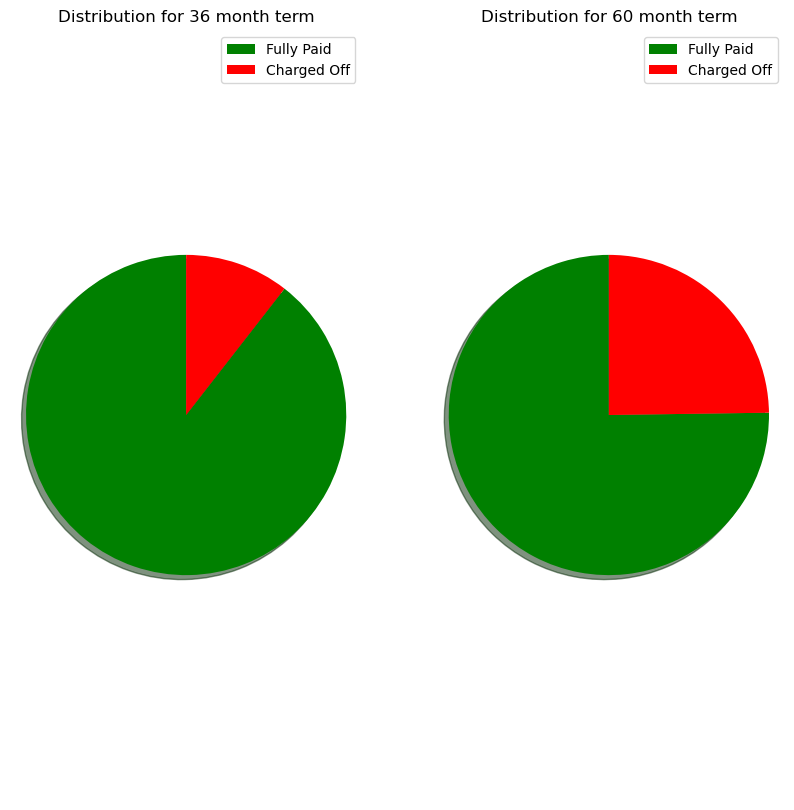

Percentage of Default in case of 36 month term = 10.528502889955044
Percentage of Default in case of 60 month term = 24.769725890578183


In [170]:

plt.figure(figsize=(10, 10))
sizes = [term_36[term_36.loan_status=='Fully Paid'].size,term_36[term_36.loan_status=='Charged Off'].size]
initPieChart(sizes,'Distribution for 36 month term',121)


sizes = [term_60[term_60.loan_status=='Fully Paid'].size,term_60[term_60.loan_status=='Charged Off'].size]
initPieChart(sizes,'Distribution for 60 month term',122)


plt.show()
print ('Percentage of Default in case of 36 month term =',100*(term_36[term_36.loan_status=='Charged Off'].size/term_36.size))
print ('Percentage of Default in case of 60 month term =',100*(term_60[term_60.loan_status=='Charged Off'].size/term_60.size))

Distribution of verification_status

In [171]:
df_ver_status=loan_df[['verification_status','loan_status']]

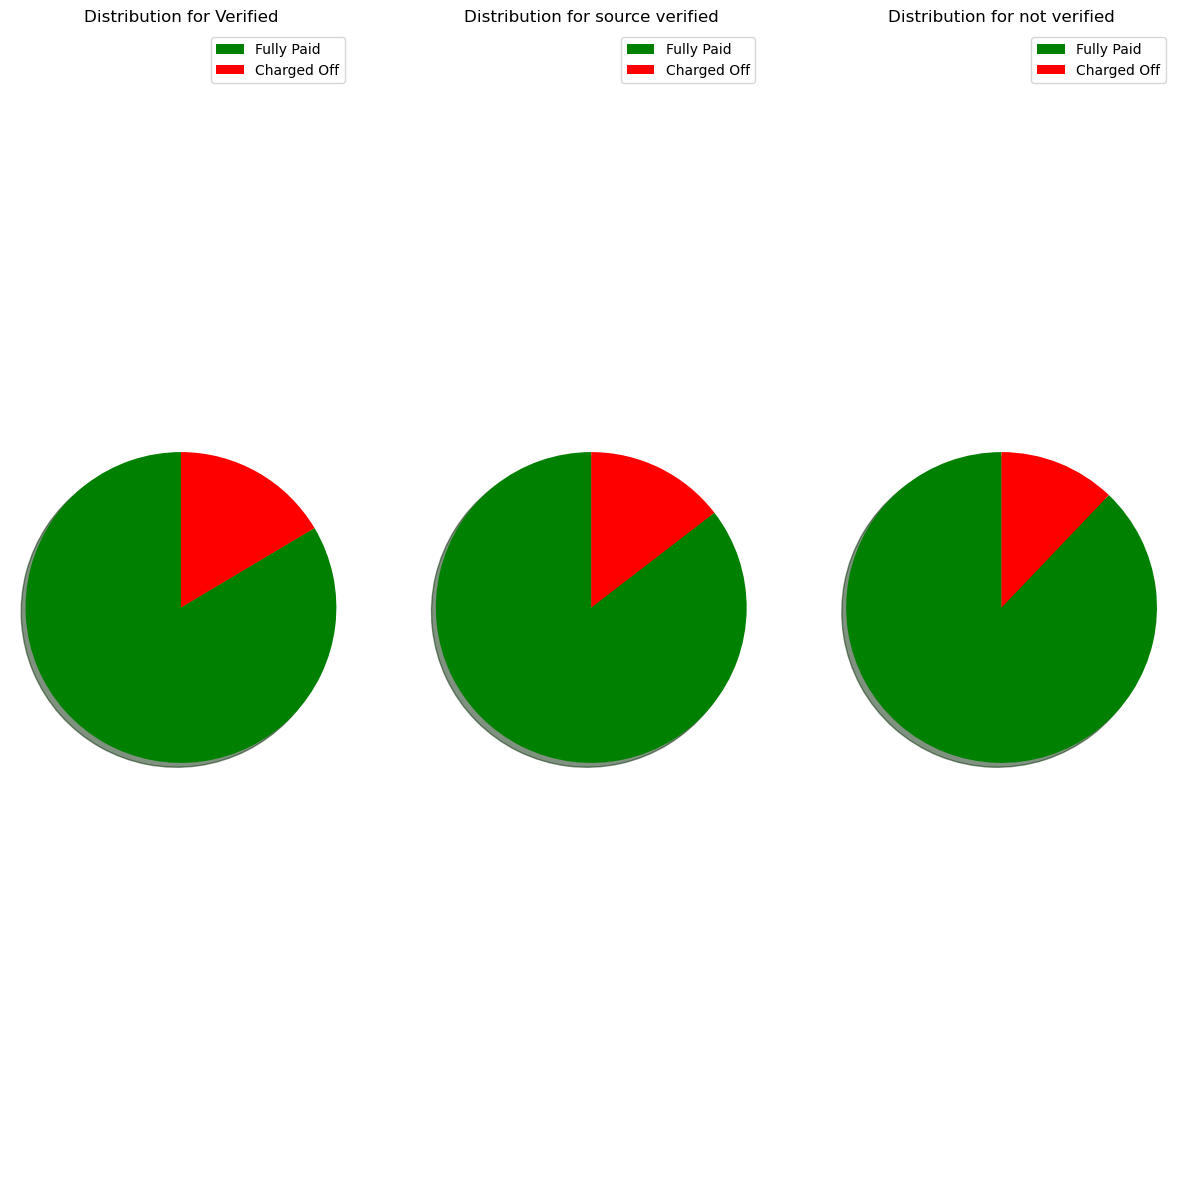

%age Default in case of verified  = 16.453028972783144
%age Default in case of source verified  = 14.556135770234988
%age Default in case of source not verified = 12.12751677852349


In [172]:
verified_df=df_ver_status[df_ver_status.verification_status == 'Verified']
source_verified_df=df_ver_status[df_ver_status.verification_status == 'Source Verified']
not_verified_df=df_ver_status[df_ver_status.verification_status == 'Not Verified']

plt.figure(figsize=(15, 15))    
sizes=[verified_df[verified_df.loan_status=='Fully Paid'].size,verified_df[verified_df.loan_status=='Charged Off'].size]
initPieChart(sizes,'Distribution for Verified',131)

sizes=[source_verified_df[source_verified_df.loan_status=='Fully Paid'].size,source_verified_df[source_verified_df.loan_status=='Charged Off'].size]
initPieChart(sizes,'Distribution for source verified',132)

sizes=[not_verified_df[not_verified_df.loan_status=='Fully Paid'].size,not_verified_df[not_verified_df.loan_status=='Charged Off'].size]
initPieChart(sizes,'Distribution for not verified',133)

plt.show()

print ('%age Default in case of verified  =',100*(verified_df[verified_df.loan_status=='Charged Off'].size/verified_df.size))
print ('%age Default in case of source verified  =',100*(source_verified_df[source_verified_df.loan_status=='Charged Off'].size/source_verified_df.size))
print ('%age Default in case of source not verified =',100*(not_verified_df[not_verified_df.loan_status=='Charged Off'].size/not_verified_df.size))



Distribution of home_ownership

In [173]:
df_home=loan_df[['home_ownership','loan_status']]

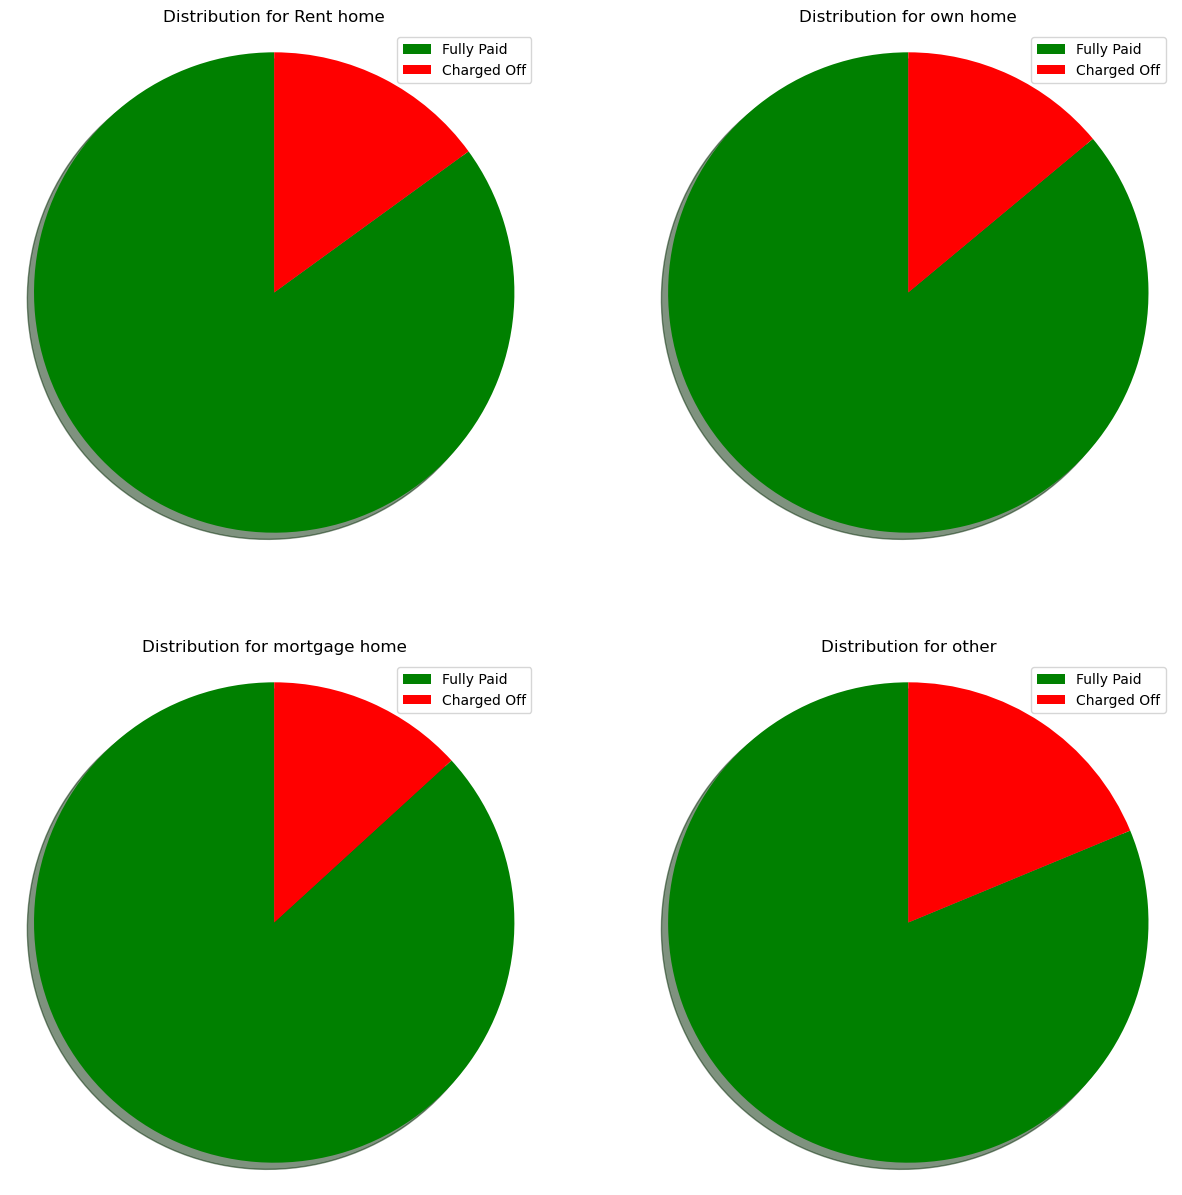

%age Default in case of Rent home = 15.003208306597445
%age Default in case of source own home  = 13.950715421303656
%age Default in case of source mortgage home = 13.212945889235073
%age Default in case of source other  = 18.75


In [174]:
rent_df=df_home[df_home.home_ownership=="RENT"]
own_df=df_home[df_home.home_ownership=="OWN"]
mortgage_df=df_home[df_home.home_ownership=="MORTGAGE"]
other_df=df_home[df_home.home_ownership=="OTHER"]

plt.figure(figsize=(15, 15))    
sizes=[rent_df[rent_df.loan_status=='Fully Paid'].size,rent_df[rent_df.loan_status=='Charged Off'].size]
initPieChart(sizes,'Distribution for Rent home',221)

sizes=[own_df[own_df.loan_status=='Fully Paid'].size,own_df[own_df.loan_status=='Charged Off'].size]
initPieChart(sizes,'Distribution for own home',222)

sizes=[mortgage_df[mortgage_df.loan_status=='Fully Paid'].size,mortgage_df[mortgage_df.loan_status=='Charged Off'].size]
initPieChart(sizes,'Distribution for mortgage home',223)

sizes=[other_df[other_df.loan_status=='Fully Paid'].size,other_df[other_df.loan_status=='Charged Off'].size]
initPieChart(sizes,'Distribution for other',224)
plt.show()

print ('%age Default in case of Rent home =',100*(rent_df[rent_df.loan_status=='Charged Off'].size/rent_df.size))
print ('%age Default in case of source own home  =',100*(own_df[own_df.loan_status=='Charged Off'].size/own_df.size))
print ('%age Default in case of source mortgage home =',100*(mortgage_df[mortgage_df.loan_status=='Charged Off'].size/mortgage_df.size))
print ('%age Default in case of source other  =',100*(other_df[other_df.loan_status=='Charged Off'].size/other_df.size))





Analyzing impact of int_rate 

In [175]:
loan_df.groupby(['loan_status','int_rate']).count()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
loan_status int_rate                                                           
Charged Off 5.42      13         13         13           13               13   
            5.79      13         13         13           13               13   
            5.99      18         18         18           18               18   
            6.03       5          5          5            5                5   
            6.17       7          7          7            7                7   
...                   ..        ...        ...          ...              ...   
Fully Paid  23.22      8          8          8            8                8   
            23.52      1          1          1            1                1   
            23.59      3          3          3            3                3   
            23.91      7          7          7            7                7   
            24.11      2          2          2            2                2   

                      term  installment  grade  sub_grade  emp_title  ...  \
loan_status int_rate                                                  ...   
Charged Off 5.42        13           13     13         13         13  ...   
            5.79        13           13     13         13         13  ...   
            5.99        18           18     18         18         18  ...   
            6.03         5            5      5          5          5  ...   
            6.17         7            7      7          7          7  ...   
...                    ...          ...    ...        ...        ...  ...   
Fully Paid  23.22        8            8      8          8          8  ...   
            23.52        1            1      1          1          1  ...   
            23.59        3            3      3          3          3  ...   
            23.91        7            7      7          7          7  ...   
            24.11        2            2      2          2          2  ...   

                      purpose  zip_code  addr_state  dti  delinq_2yrs  \
loan_status int_rate                                                    
Charged Off 5.42           13        13          13   13           13   
            5.79           13        13          13   13           13   
            5.99           18        18          18   18           18   
            6.03            5         5           5    5            5   
            6.17            7         7           7    7            7   
...                       ...       ...         ...  ...          ...   
Fully Paid  23.22           8         8           8    8            8   
            23.52           1         1           1    1            1   
            23.59           3         3           3    3            3   
            23.91           7         7           7    7            7   
            24.11           2         2           2    2            2   

                      inq_last_6mths  pub_rec  out_prncp  out_prncp_inv  \
loan_status int_rate                                                      
Charged Off 5.42                  13       13         13             13   
            5.79                  13       13         13             13   
            5.99                  18       18         18             18   
            6.03                   5        5          5              5   
            6.17                   7        7          7              7   
...                              ...      ...        ...            ...   
Fully Paid  23.22                  8        8          8              8   
            23.52                  1        1          1              1   
            23.59                  3        3          3              3   
            23.91                  7        7          7              7   
            24.11                  2        2          2              2   

                      pub_rec_bankruptcies  
loan_sta

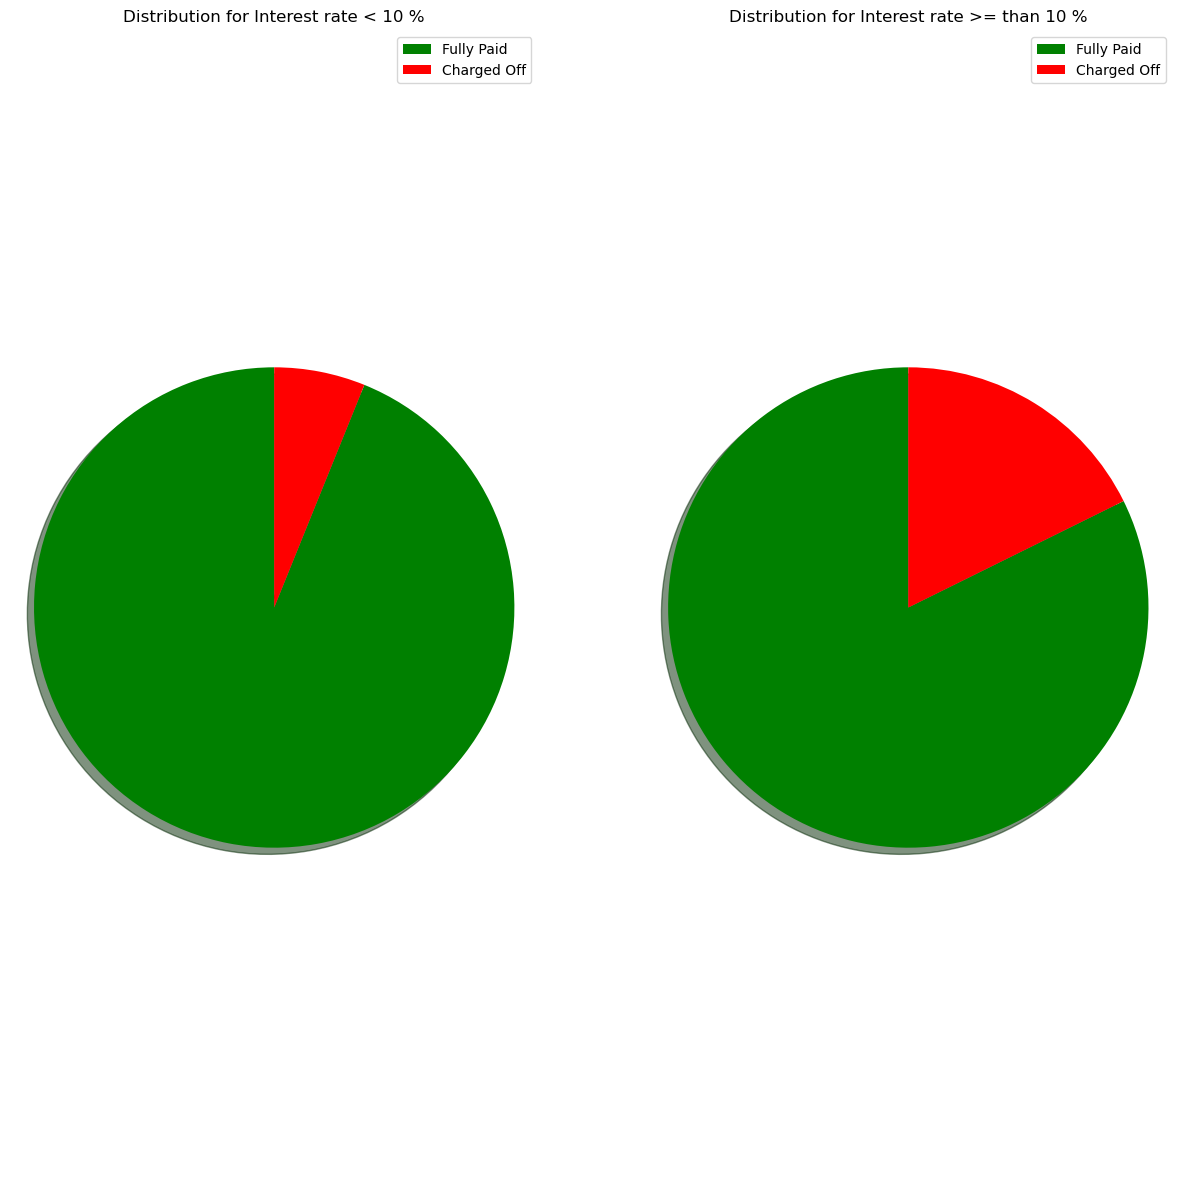

%age defaults when rate of interest is less than 10 % is =  6.124137931034483
%age defaults when rate of interest is greater than 10 % is =  17.690088186288456
%age Fully paid when rate of interest is less than 10 % is =  93.87586206896552
%age Fully paid when rate of interest is greater than 10 % is =  82.30991181371155


In [176]:
df_int=loan_df[['loan_status','int_rate']]
intLT10FullPaid =df_int[(df_int.int_rate < 10) & (df_int.loan_status == 'Fully Paid')]
intGT10FullPaid =df_int[(df_int.int_rate >= 10) & (df_int.loan_status == 'Fully Paid')]
intLT10Default =df_int[(df_int.int_rate < 10) & (df_int.loan_status == 'Charged Off')]
intGT10Default =df_int[(df_int.int_rate >= 10) & (df_int.loan_status == 'Charged Off')]
intLT10 =intLT10FullPaid.size+intLT10Default.size
intGT10 = intGT10Default.size+intGT10FullPaid.size

plt.figure(figsize=(15, 15))    
sizes=[intLT10FullPaid.size,intLT10Default.size]
initPieChart(sizes,'Distribution for Interest rate < 10 %',121)

sizes=[intGT10FullPaid.size,intGT10Default.size]
initPieChart(sizes,'Distribution for Interest rate >= than 10 %',122)
plt.show()

print ('%age defaults when rate of interest is less than 10 % is = ',
       100 *(intLT10Default.size/intLT10))
print ('%age defaults when rate of interest is greater than 10 % is = ',
       100*(intGT10Default.size/intGT10))
print ('%age Fully paid when rate of interest is less than 10 % is = ',
       100 *(intLT10FullPaid.size/intLT10))
print ('%age Fully paid when rate of interest is greater than 10 % is = ',
       100*(intGT10FullPaid.size/intGT10))

In [177]:
def plot_boxPlot(df,param):
    
    df_fully_paid =df[df.loan_status == 'Fully Paid']
    default_paid_df=df[df.loan_status  == 'Charged Off']
    
    plt.figure(figsize=(20, 10)) 
    plt.subplot(1,2,1)
    sns.boxplot(y=default_paid_df[param])
    plt.title(param +' distribution for Default ',fontsize=20)
    
    plt.subplot(1,2,2)
    sns.boxplot(y=df_fully_paid[param])
    plt.title(param +' distribution for Fully Paid ',fontsize=20)
    plt.show()

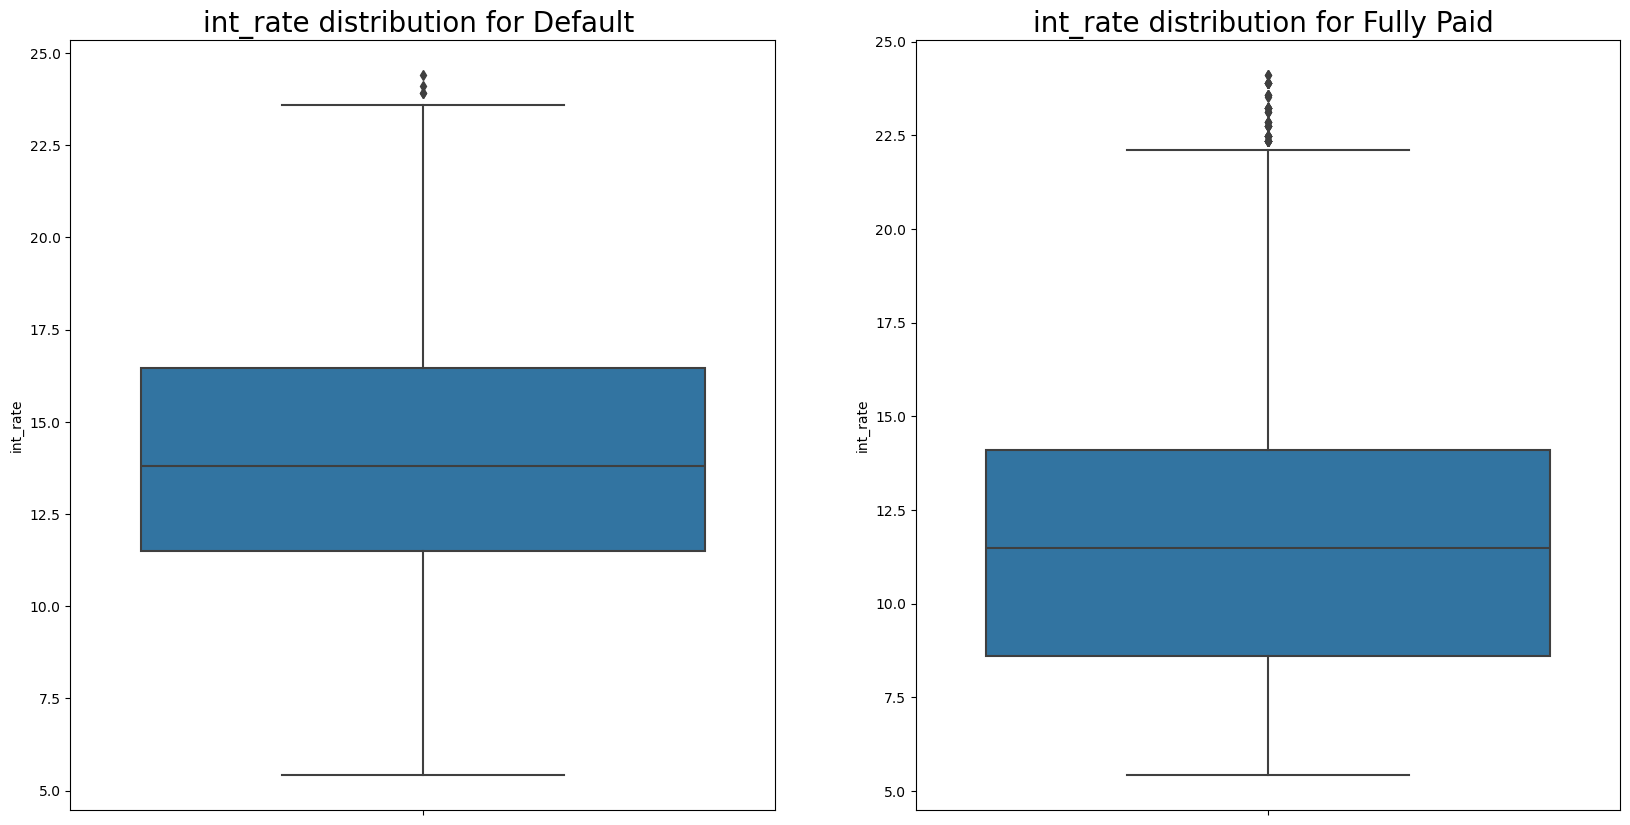

In [178]:
plot_boxPlot(df_int,'int_rate')

 Impact of income on default

In [179]:
df_income=loan_df[['loan_status','annual_inc']]

In [180]:
df_income.describe()

,annual_inc
count,3.548200e+04
mean,6.902437e+04
std,6.392552e+04
min,4.000000e+03
25%,4.124625e+04
50%,6.000000e+04
75%,8.230000e+04
max,6.000000e+06


 let us drop columns where income >150000 for annual income distribution 

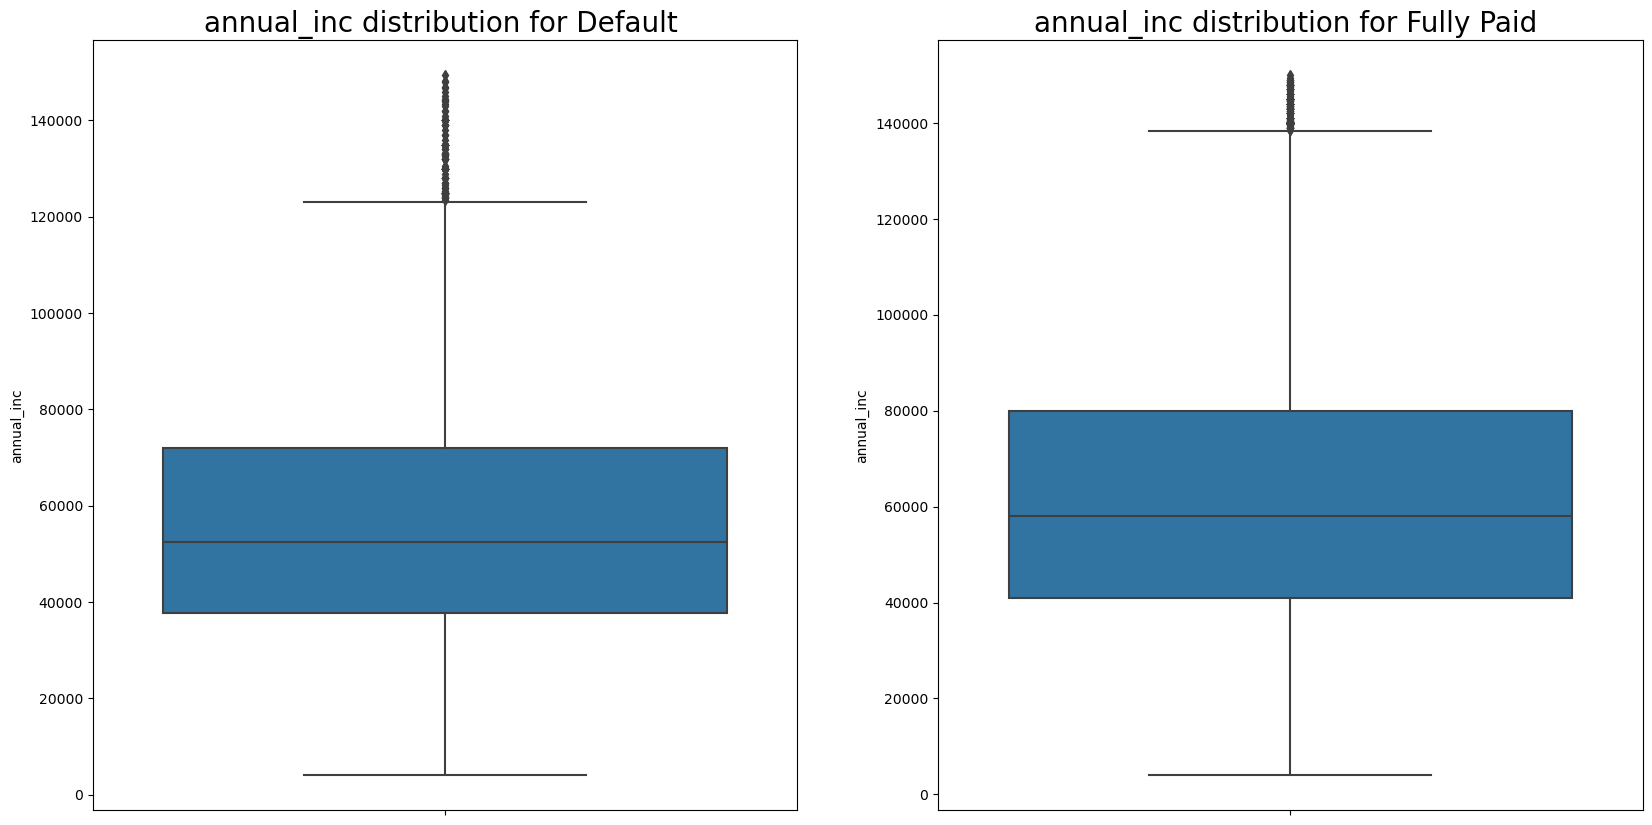

In [181]:
df_income=df_income[df_income.annual_inc <150000]
plot_boxPlot(df_income,'annual_inc')

emp_length on loan default

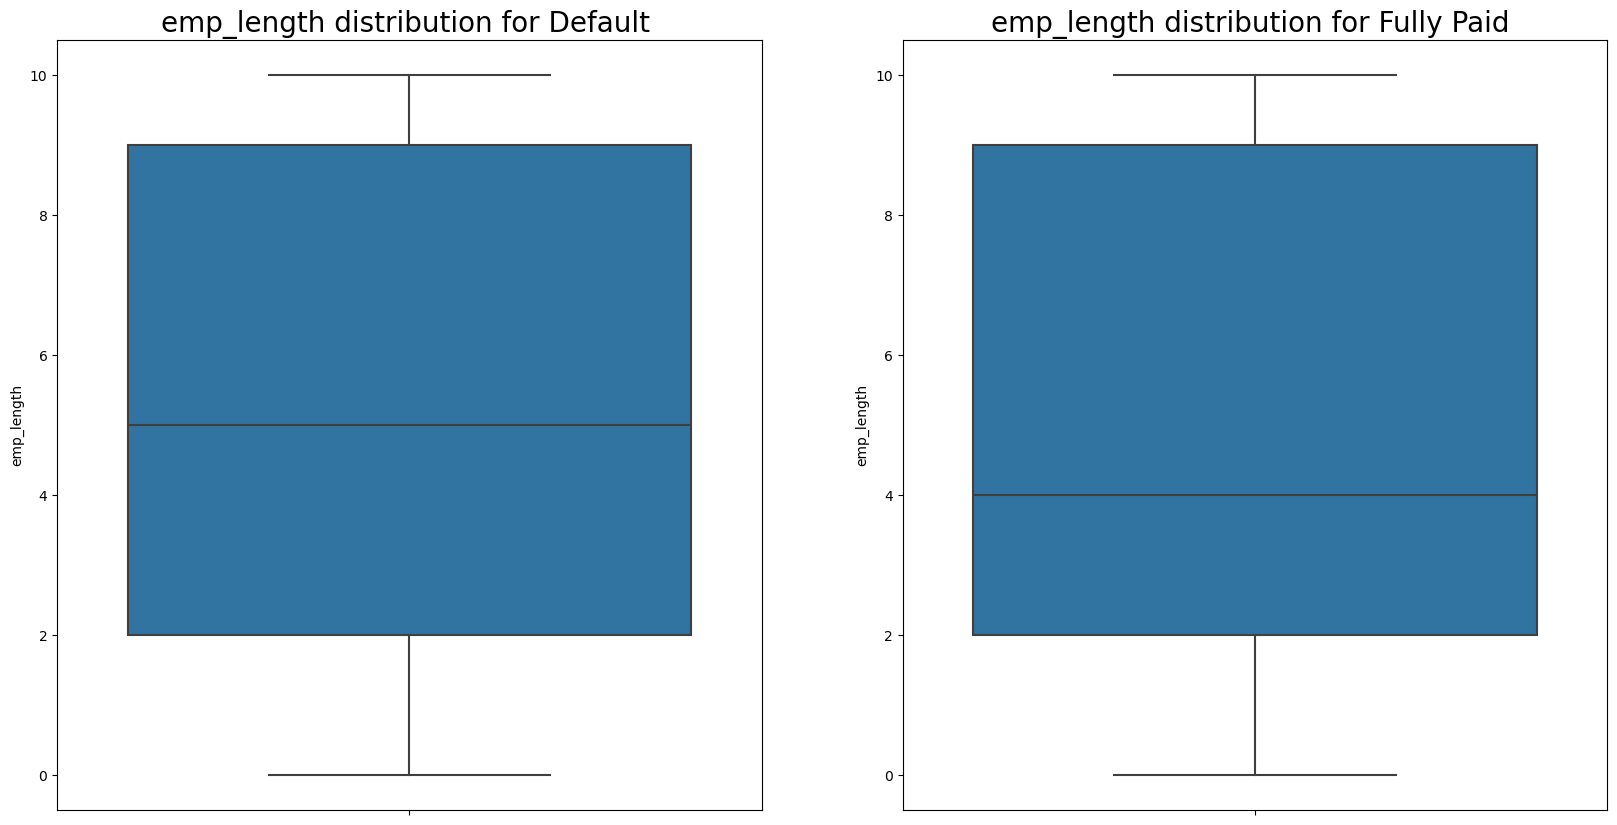

In [182]:
loan_df['emp_length']=loan_df['emp_length'].apply(lambda x: int(x))
df_emp_length = loan_df[['loan_status','emp_length']]
plot_boxPlot(df_emp_length,'emp_length')

pub_rec_bankruptcies impact on loan default

In [183]:
df_bankrupt=loan_df[['loan_status','pub_rec_bankruptcies']]

In [184]:
bk_0=df_bankrupt[df_bankrupt.pub_rec_bankruptcies ==0]
bak_gt0=df_bankrupt[df_bankrupt.pub_rec_bankruptcies >0]

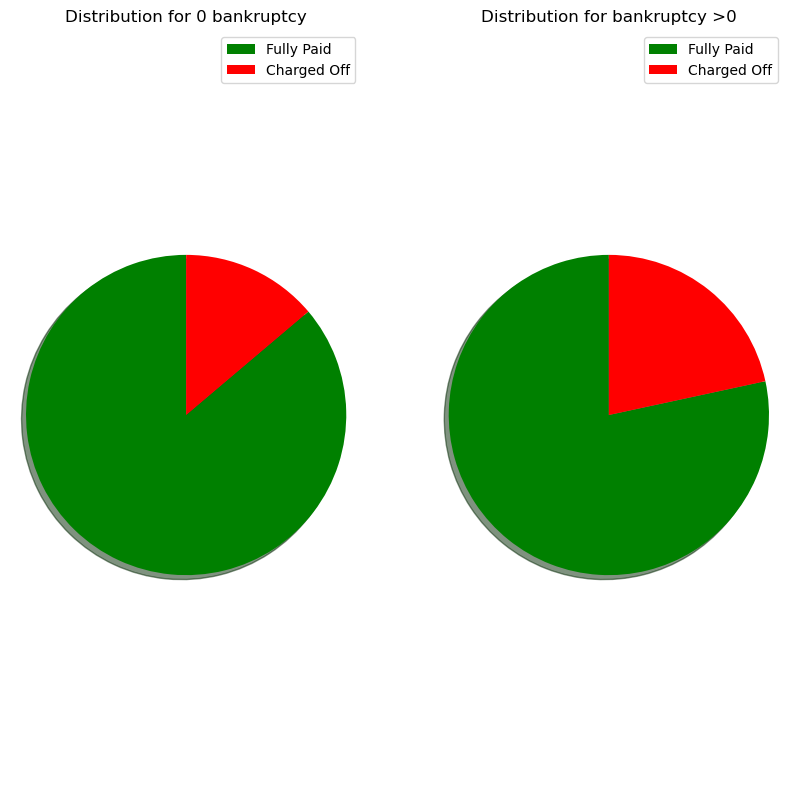

%age Default in case of 0 bankruptcy record= 13.821090395812504
%age Defaultt in case bankruptcy record > 0 = 21.612466124661246


In [185]:
plt.figure(figsize=(10, 10))
sizes = [bk_0[bk_0.loan_status=='Fully Paid'].size,bk_0[bk_0.loan_status=='Charged Off'].size]
initPieChart(sizes,'Distribution for 0 bankruptcy',121)

sizes = [bak_gt0[bak_gt0.loan_status=='Fully Paid'].size,bak_gt0[bak_gt0.loan_status=='Charged Off'].size]
initPieChart(sizes,'Distribution for bankruptcy >0',122)

plt.show()
print ('%age Default in case of 0 bankruptcy record=',100*(bk_0[bk_0.loan_status=='Charged Off'].size/bk_0.size))
print ('%age Defaultt in case bankruptcy record > 0 =',100*(bak_gt0[bak_gt0.loan_status=='Charged Off'].size/bak_gt0.size))

pub_rec impact on loan default

In [186]:
df_pub_rec = loan_df[['pub_rec','loan_status']]
pub_rec_default=df_pub_rec[df_pub_rec.loan_status=="Charged Off"]

/var/folders/d2/h77zdl6d6w5179zpccq2r98h0000gq/T/ipykernel_27209/1272030369.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sizes = [pub_rec_0[df_pub_rec.loan_status=='Fully Paid'].size,df_pub_rec[df_pub_rec.loan_status=='Charged Off'].size]


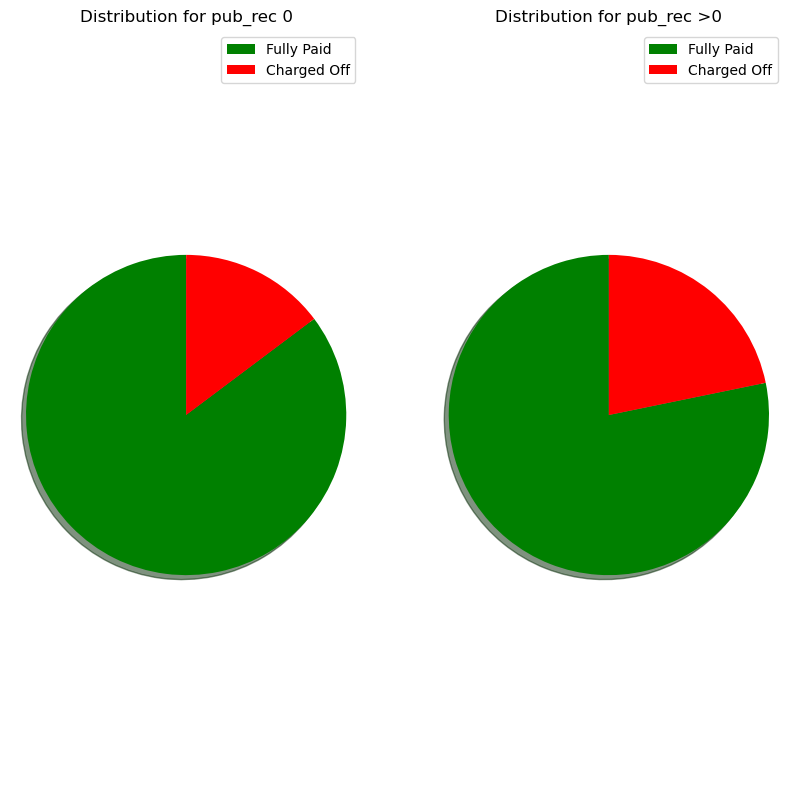

Percentage of Default in case of 0 public record= 13.72315745642734
Percentage of Default in case public record > 0 = 21.774193548387096


In [187]:
pub_rec_0=df_pub_rec[df_pub_rec.pub_rec==0]
pub_recGT0=df_pub_rec[df_pub_rec.pub_rec >0]

plt.figure(figsize=(10, 10))
sizes = [pub_rec_0[df_pub_rec.loan_status=='Fully Paid'].size,df_pub_rec[df_pub_rec.loan_status=='Charged Off'].size]
initPieChart(sizes,'Distribution for pub_rec 0',121)


sizes = [pub_recGT0[pub_recGT0.loan_status=='Fully Paid'].size,pub_recGT0[pub_recGT0.loan_status=='Charged Off'].size]
initPieChart(sizes,'Distribution for pub_rec >0',122)


plt.show()
print ('Percentage of Default in case of 0 public record=',100*(pub_rec_0[pub_rec_0.loan_status=='Charged Off'].size/pub_rec_0.size))
print ('Percentage of Default in case public record > 0 =',100*(pub_recGT0[pub_recGT0.loan_status=='Charged Off'].size/pub_recGT0.size))

Analyzing impact of loan_amnt on default. There is no impact

In [188]:
df_amt =loan_df[['loan_status','loan_amnt']]

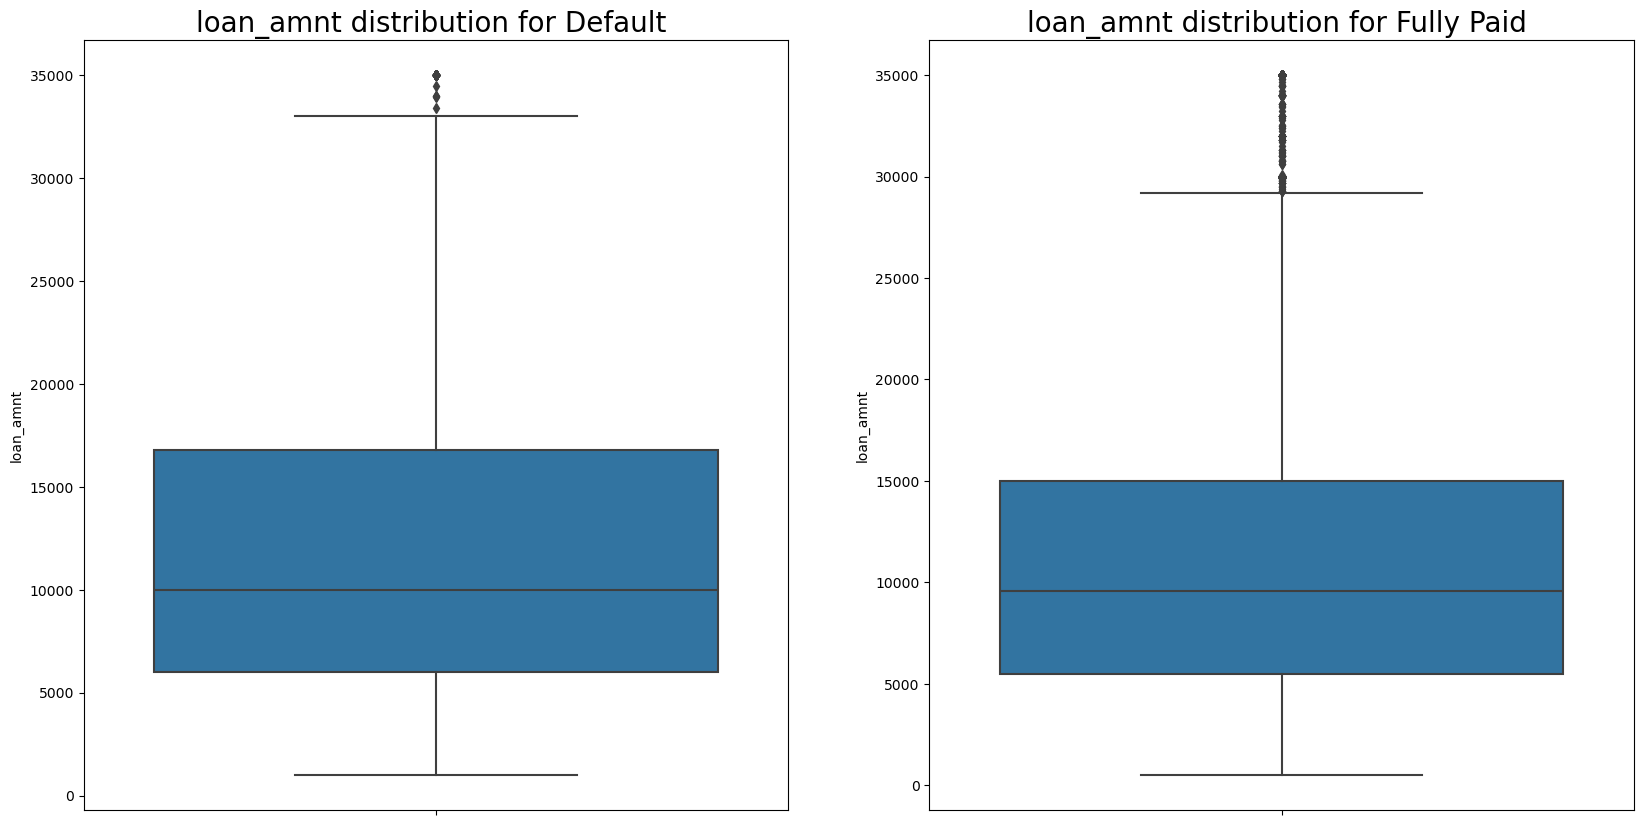

In [189]:
plot_boxPlot(df_amt,'loan_amnt')

Analyzing impact of installment on loan default

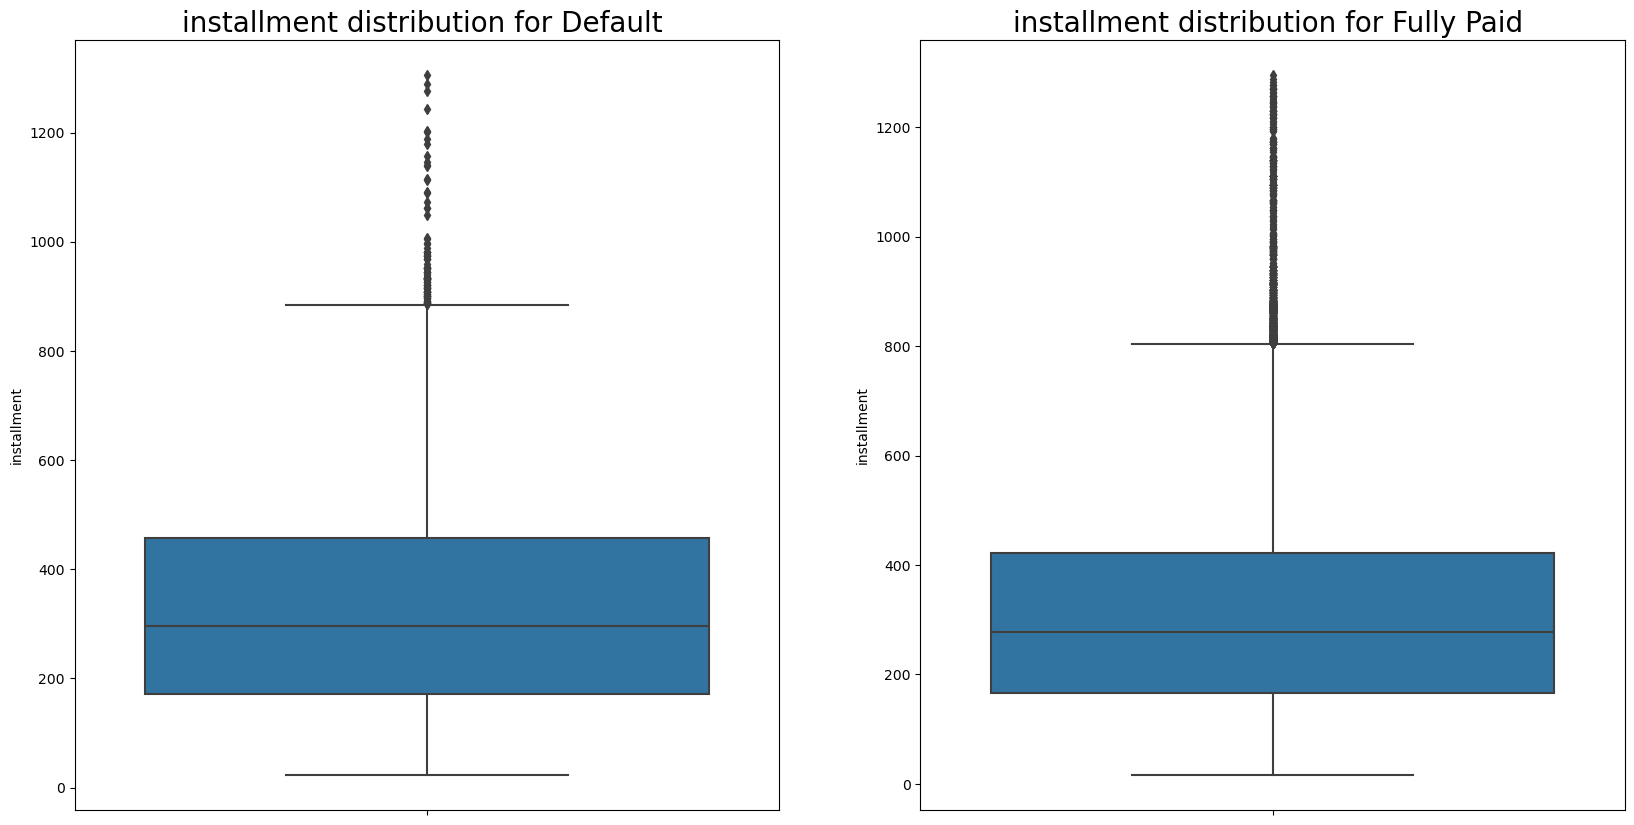

In [190]:
df_inst = loan_df[['installment','loan_status']]
plot_boxPlot(df_inst,'installment')

Checking impact of addr_state on loan default

In [191]:
df_addr_state =loan_df[['addr_state','loan_status','purpose']]
df_addr_state.head()

,addr_state,loan_status,purpose
1,GA,Charged Off,car
3,CA,Fully Paid,other
5,AZ,Fully Paid,wedding
6,NC,Fully Paid,debt_consolidation
7,CA,Fully Paid,car


In [192]:

from scipy.stats import chi2_contingency


loan_df['charged_off'] = 0 #initialize with 0 for Charged Off
loan_df['fully_paid']  = 0 #initialize with 0 for fully paid
loan_df.loc[loan_df.loan_status =='Charged Off','charged_off']=1
loan_df.loc[loan_df.loan_status =='Fully Paid','fully_paid']=1
loan_df.fully_paid.sum() + loan_df.charged_off.sum()


def analyzeloandfsegment(column ,showsize=10):
        loan_df_column_status=loan_df.pivot_table(values=['charged_off','fully_paid'],index=[column],aggfunc=('sum'))
        #Calculate Chi Score on the aggregated table
        chi2, p, dof, expected=chi2, p, dof, expected = chi2_contingency(loan_df_column_status)
        print('Chi2 Score: {0}'.format(chi2))
        print('p Value: {0}'.format(p))
        print('Degrees of Freedom:{0}'.format(dof))
        #Lets see the index	spread
        loan_df_column_status['percent_charged_off']= round(100*loan_df_column_status.charged_off/(loan_df_column_status.charged_off + loan_df_column_status.fully_paid),2)
        loan_df_column_status['bad_to_good_ratio']= loan_df_column_status.charged_off/loan_df_column_status.fully_paid
        loan_df_column_status.head(showsize)
        return loan_df_column_status

In [193]:

def analyzeloandfsegmentbin(bin_on_column,new_bin_col_name ,bins, showsize=10):
   
        
        loan_df[new_bin_col_name] = pd.cut(loan_df[bin_on_column], bins=bins)
        loan_df_column_status=loan_df.pivot_table(values=['charged_off','fully_paid'],index=[new_bin_col_name],aggfunc=('sum'))
        #Calculate Chi Score on the aggregated table
        chi2, p, dof, expected=chi2, p, dof, expected = chi2_contingency(loan_df_column_status)
        print('Chi2 Score: {0}'.format(chi2))
        print('p Value: {0}'.format(p))
        print('Degrees of Freedom:{0}'.format(dof))
        #Lets see the index	spread
        loan_df_column_status['percent_charged_off']= round(100*loan_df_column_status.charged_off/(loan_df_column_status.charged_off + loan_df_column_status.fully_paid),2)
        loan_df_column_status['bad_to_good_ratio']= loan_df_column_status.charged_off/loan_df_column_status.fully_paid
        loan_df_column_status.head(showsize)
        return loan_df_column_status

In [194]:


def univariatesegmentedplot(column_name,df_plot):
   
        plt.figure(figsize=(16, 6),dpi=80, facecolor='w', edgecolor='k')

        plt.suptitle('Segmented Univariate Analysis -' + column_name , fontsize=24)
        plt.rc("font", size=10)

        sns.barplot(x=df_plot.index, y='bad_to_good_ratio', data=df_plot)
        plt.title('Loan Default Index vs ' + column_name)
        plt.xlabel(column_name,rotation=0, fontsize=20, labelpad=20)
        plt.xticks(rotation=45,fontsize=10)
        plt.ylabel('Loan Default Index',rotation=90, fontsize=20, labelpad=20)
        plt.show()
        return

In [195]:

def plotcorr(df,size=10):

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.title('Corelation Matrix map ')
    plt.show()

In [196]:
# loan_income_group v/s defaulters based on the income 

income_group_ordinal=list(np.arange(0,350000,50000))
df1=analyze_loan_df_segment_bin('annual_inc','annual_income_group',income_group_ordinal)
df1.sort_values(by='bad_to_good_ratio',ascending=False)

Chi2 Score: 128.5565332982258
p Value: 4.817905042927029e-26
Degrees of Freedom:5


,charged_off,fully_paid,percent_charged_off,bad_to_good_ratio
annual_income_group,,,,
"(0, 50000]",2279,11522,16.51,0.197796
"(50000, 100000]",2210,14447,13.27,0.152973
"(150000, 200000]",90,728,11.00,0.123626
"(100000, 150000]",391,3320,10.54,0.117771
"(200000, 250000]",23,214,9.70,0.107477
"(250000, 300000]",8,100,7.41,0.080000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


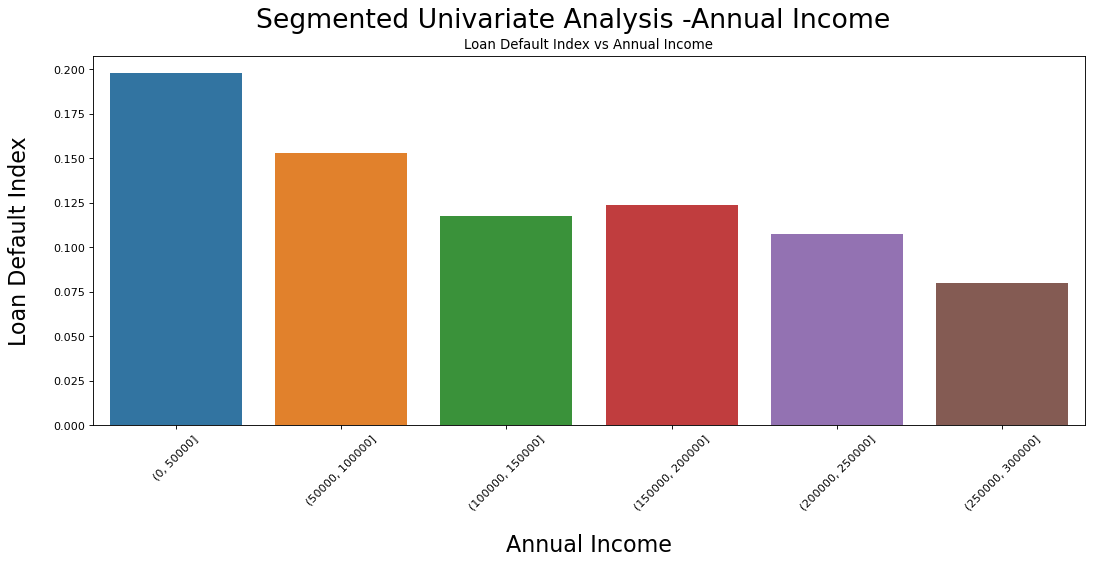

In [210]:

univariatesegmentedplot('Annual Income',df1)

In [211]:
# loan grade v/s loan defaulters based on the grade
grade_df=analyze_loan_df_segment('grade').sort_values(by='percent_charged_off',ascending=False)

Chi2 Score: 1451.9168521907977
p Value: 1.3875589123989e-310
Degrees of Freedom:6


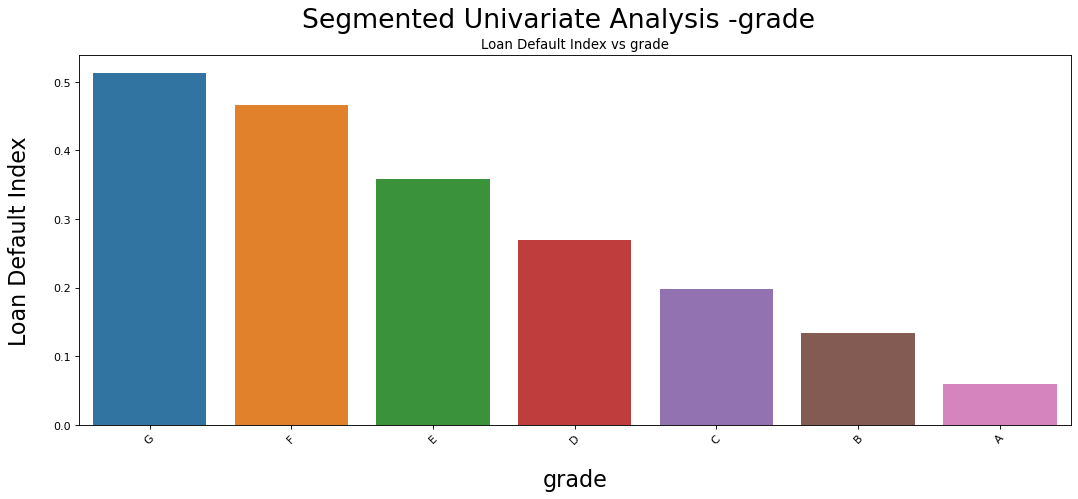

In [212]:
univariatesegmentedplot('grade',grade_df)

Chi2 Score: 1563.904021138112
p Value: 2.408715132249426e-307
Degrees of Freedom:34


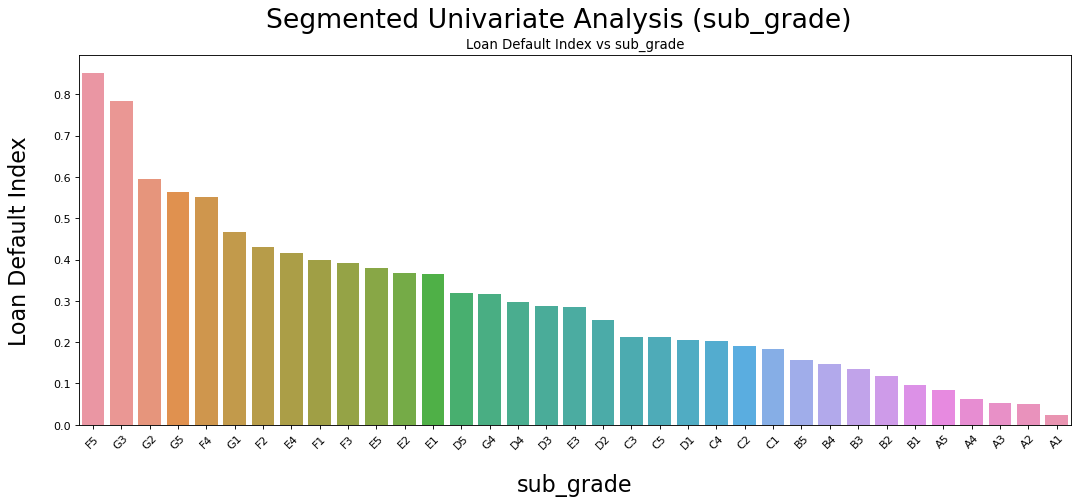

In [200]:
#Plot the histogram lets see the distribution
subgrade_df=analyze_loan_df_segment('sub_grade').sort_values(by='percent_charged_off',ascending=False)
univariate_segmented_plot('sub_grade',subgrade_df)

Chi2 Score: 11.36418241706117
p Value: 0.02276205884708695
Degrees of Freedom:4


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


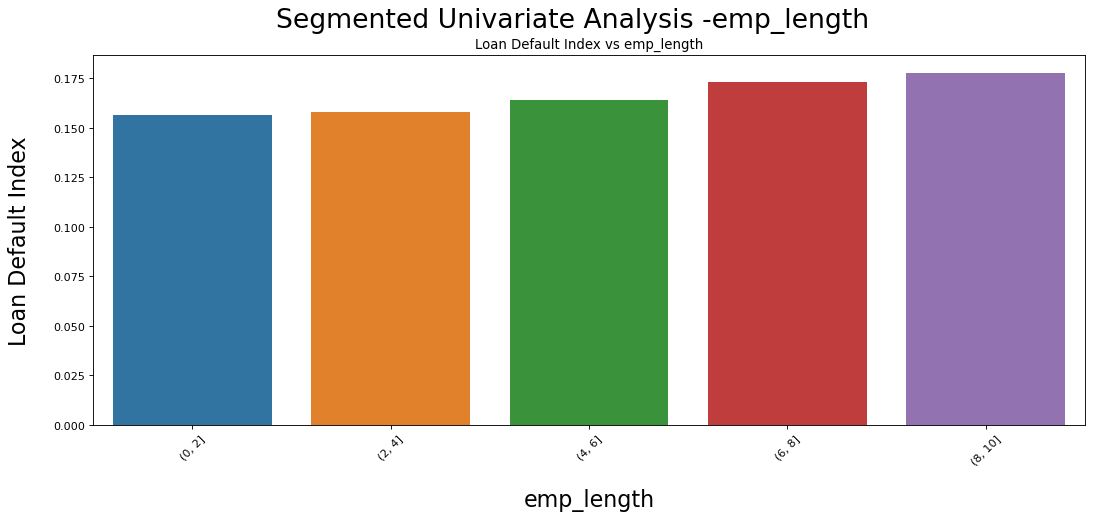

In [201]:
#distribution for emp_length
emp_length_ordinal=list(np.arange(0,12,2))
emp_length_df=analyze_loan_df_segment_bin('emp_length','emp_length_group',emp_length_ordinal)
univariatesegmentedplot('emp_length',emp_length_df)

Chi2 Score: 132.1965818900917
p Value: 8.442664478926769e-10
Degrees of Freedom:48


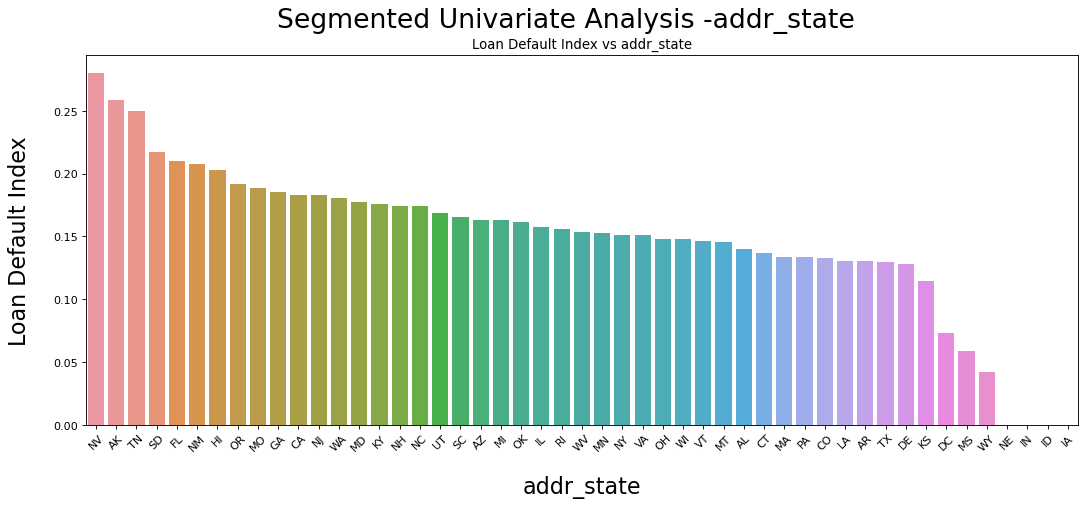

In [202]:
#distribution for States
addr_state_df=analyze_loan_df_segment('addr_state').sort_values(by='percent_charged_off',ascending=False)
univariatesegmentedplot('addr_state',addr_state_df)

Chi2 Score: 23.40134292501139
p Value: 3.3305541943569266e-05
Degrees of Freedom:3


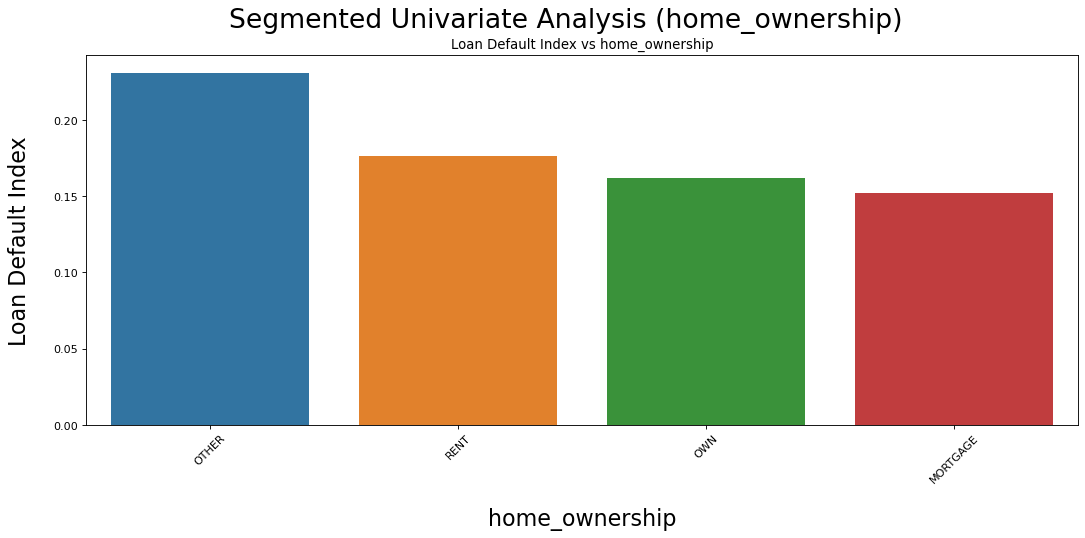

In [203]:
# impact on home_ownership
home_ownership_df=analyze_loan_df_segment('home_ownership').sort_values(by='percent_charged_off',ascending=False)
univariate_segmented_plot('home_ownership',home_ownership_df)


Chi2 Score: 34.94494410858332
p Value: 1.2513181699134847e-07
Degrees of Freedom:3


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


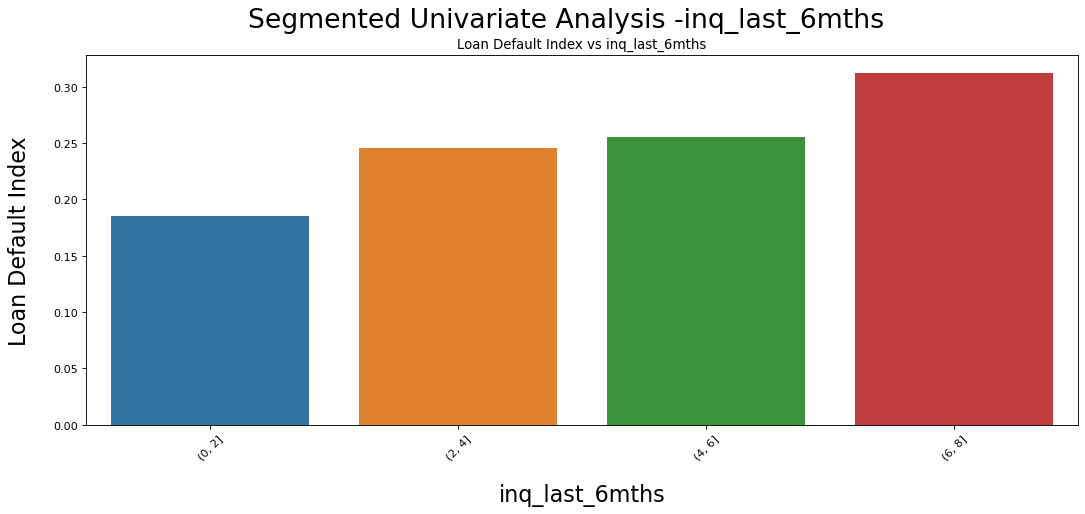

In [204]:
# Distribution of last 6 month enquiry
inq_last_6mths_ordinal=list(np.arange(0,9,2))
inq_last_6mths_df=analyze_loan_df_segment_bin('inq_last_6mths','inq_last_6mths_group',inq_last_6mths_ordinal).sort_values(by='percent_charged_off',ascending=False)
univariatesegmentedplot('inq_last_6mths',inq_last_6mths_df)

Chi2 Score: 1486.9475680269425
p Value: 0.0
Degrees of Freedom:3


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


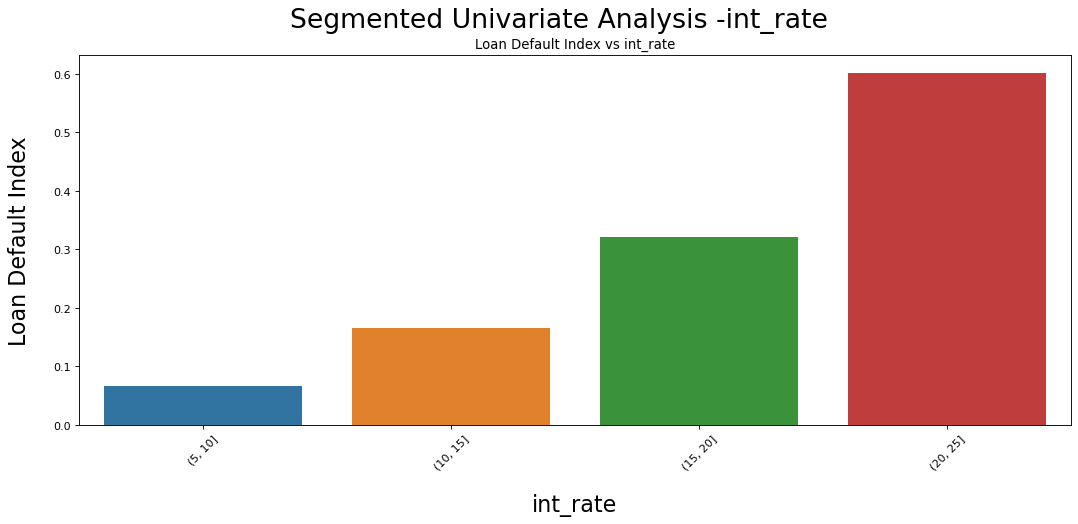

In [205]:
#Distribution for interest rate
int_rate_ordinal=list(np.arange(5,30,5))
int_rate_df=analyze_loan_df_segment_bin('int_rate','iint_rate_ordinal_group',int_rate_ordinal).sort_values(by='percent_charged_off',ascending=False)
univariatesegmentedplot('int_rate',int_rate_df)

Chi2 Score: 72.10798069680351
p Value: 2.1976116114986878e-16
Degrees of Freedom:2


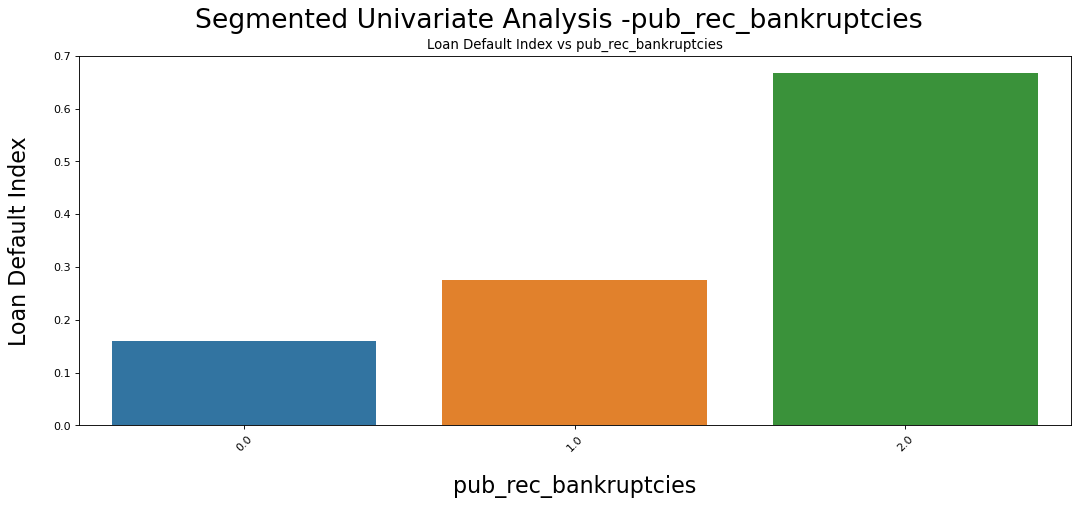

In [206]:
#Distribution for bankruptcies
pub_rec_bankruptcies_df=analyze_loan_df_segment('pub_rec_bankruptcies').sort_values(by='percent_charged_off',ascending=False)
univariatesegmentedplot('pub_rec_bankruptcies',pub_rec_bankruptcies_df)

Chi2 Score: 325.4435467677602
p Value: 1.1204721312301091e-61
Degrees of Freedom:13


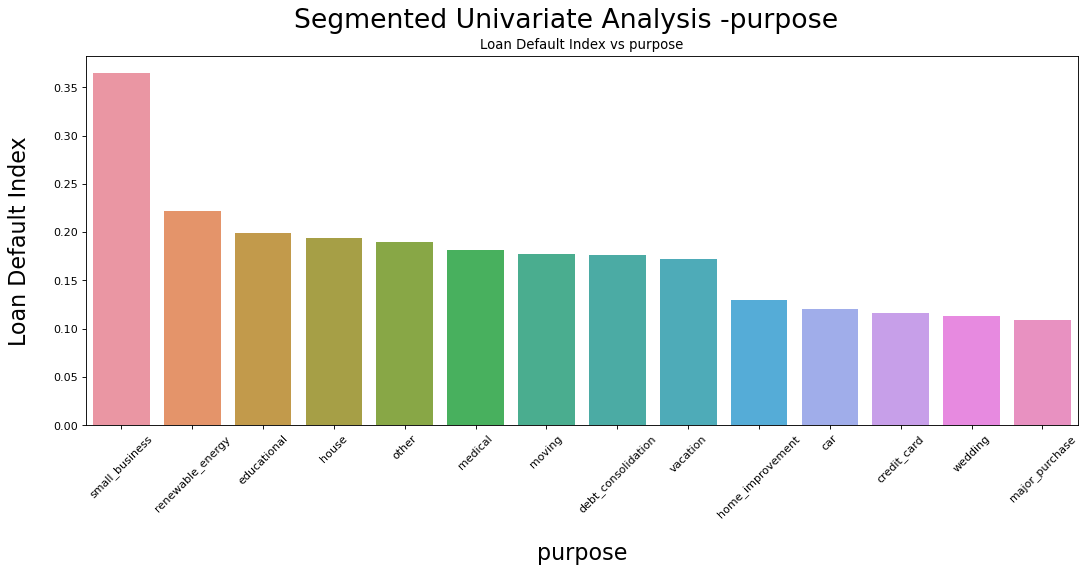

In [207]:
##purpose vs loan status
percent_charged_off_df=analyze_loan_df_segment('purpose').sort_values(by='percent_charged_off',ascending=False)
#Plot the histogram lets see the distribution
univariatesegmentedplot('purpose',percent_charged_off_df)

In [208]:
##Bivariate Analysis for the below chosen fields.
corelated_fields=loan_df[['charged_off','fully_paid','annual_inc','dti','inq_last_6mths','installment','int_rate','loan_amnt','pub_rec_bankruptcies']].copy()
corelated_fields.corr()

,charged_off,fully_paid,annual_inc,dti,inq_last_6mths,installment,int_rate,loan_amnt,pub_rec_bankruptcies
charged_off,1.000000,-1.000000,-0.039914,0.044877,0.069170,0.026951,0.213267,0.061181,0.044934
fully_paid,-1.000000,1.000000,0.039914,-0.044877,-0.069170,-0.026951,-0.213267,-0.061181,-0.044934
annual_inc,-0.039914,0.039914,1.000000,-0.120453,0.033312,0.256795,0.046424,0.259282,-0.010892
dti,0.044877,-0.044877,-0.120453,1.000000,0.004093,0.054591,0.109318,0.063567,0.006639
inq_last_6mths,0.069170,-0.069170,0.033312,0.004093,1.000000,0.008644,0.135144,0.010459,0.014351
installment,0.026951,-0.026951,0.256795,0.054591,0.008644,1.000000,0.274498,0.930884,-0.028852
int_rate,0.213267,-0.213267,0.046424,0.109318,0.135144,0.274498,1.000000,0.298033,0.083757
loan_amnt,0.061181,-0.061181,0.259282,0.063567,0.010459,0.930884,0.298033,1.000000,-0.030693
pub_rec_bankruptcies,0.044934,-0.044934,-0.010892,0.006639,0.014351,-0.028852,0.083757,-0.030693,1.000000


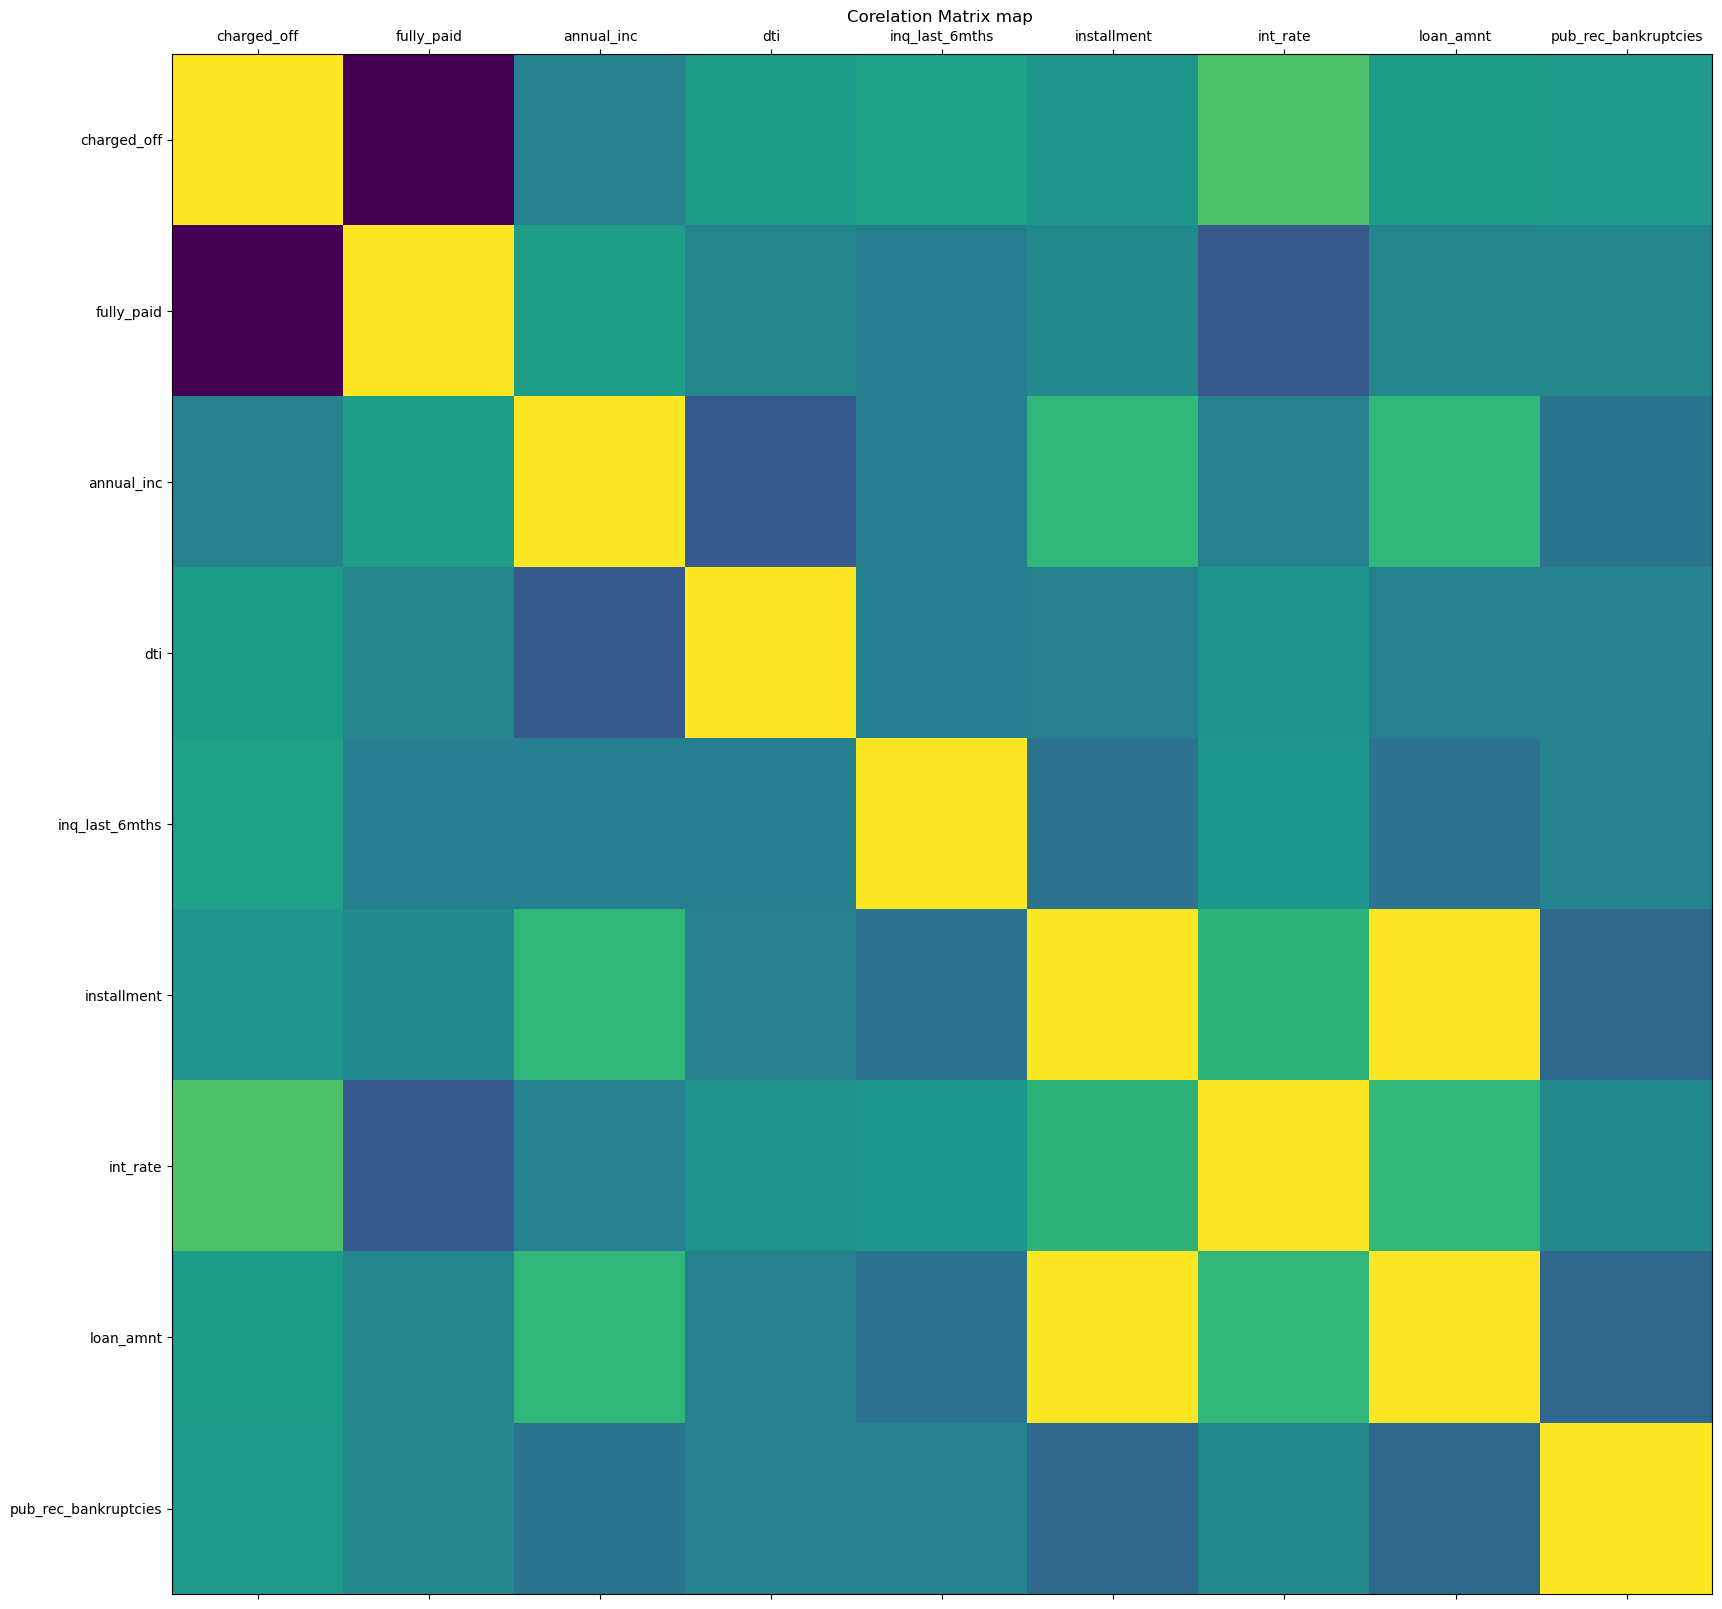

In [209]:
plotcorr(corelated_fields.corr(),20)